In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
from tqdm import tqdm
import xgboost as xgb
import tensorflow as tf
import cv2
# from keras.applications.resnet18 import ResNet18
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.layers import Flatten, Input
from tensorflow.keras.utils import img_to_array, load_img
import scipy
from sklearn.metrics import fbeta_score
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost
import glob

In [ ]:
# preprocessing train data
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True) 

In [ ]:
train_path='/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1/train'
test_path='/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1/test'

In [ ]:
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(150,150),
                                              batch_size=64,
                                              class_mode='categorical')

# ppreprocessing test data
test_datagen=ImageDataGenerator(rescale=1./255)

testing_set=train_datagen.flow_from_directory(test_path,
                                               target_size=(150,150),
                                              batch_size=64,
                                              class_mode='categorical')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [ ]:
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same',kernel_size=3, activation='relu', strides=2,input_shape=[150,150,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same',kernel_size=3, activation='relu', strides=2,input_shape=[150,150,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# for multiclassification to work with SVM
cnn.add(Dense(4,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax'))

cnn.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='squared_hinge', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
# for precision and recall
r=cnn.fit(x=training_set, validation_data=testing_set,epochs=50)


Epoch 1/50
81/81 [==============================] - 1627s 20s/step - loss: 1.2423 - accuracy: 0.4835 - precision: 0.4897 - recall: 0.4640 - val_loss: 1.2329 - val_accuracy: 0.4511 - val_precision: 0.4507 - val_recall: 0.4472
Epoch 2/50
81/81 [==============================] - 64s 790ms/step - loss: 1.1978 - accuracy: 0.5151 - precision: 0.5173 - recall: 0.5071 - val_loss: 1.1834 - val_accuracy: 0.5113 - val_precision: 0.5130 - val_recall: 0.5074
Epoch 3/50
81/81 [==============================] - 74s 911ms/step - loss: 1.1747 - accuracy: 0.5313 - precision: 0.5343 - recall: 0.5278 - val_loss: 1.1823 - val_accuracy: 0.5106 - val_precision: 0.5135 - val_recall: 0.5066
Epoch 4/50
81/81 [==============================] - 79s 974ms/step - loss: 1.1586 - accuracy: 0.5546 - precision: 0.5568 - recall: 0.5515 - val_loss: 1.1933 - val_accuracy: 0.5012 - val_precision: 0.5016 - val_recall: 0.5012
Epoch 5/50
81/81 [==============================] - 77s 955ms/step - loss: 1.1563 - accuracy: 0.5604

In [3]:

import os        
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [10]:
# case 5 using habiba's CNN

import matplotlib.pyplot as plt




def train_test():
    
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # 4 output neuron for the 4 classes of Alzhemir Images
    tf.keras.layers.Dense(4,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax')

    ])

   

    model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='squared_hinge', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

        

    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory

    

    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255,)
   
    #training data
    train_generator = train_datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1/train/",
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
    )

    epochs = 70
    #Testing data
    validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1//test/',
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42) # set as validation data
       
    #Model fitting for a number of epochs
    history = model.fit(
      train_generator,
      steps_per_epoch=int(5121/32),
      epochs=epochs,
      validation_data = validation_generator,
      validation_steps = int(1279/32),
      verbose=1)
    
        
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    #This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)
    plt.plot(history.history['accuracy'],history.history['val_accuracy'])
    #plt.plot()
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'],history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
  
    '''
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    '''
    # returns accuracy of training
    print("Training Accuracy:"), print(history.history['accuracy'][-1])
    print("Testing Accuracy:"), print (history.history['val_accuracy'][-1])

    

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/70
160/160 [==============================] - 826s 5s/step - loss: 1.2221 - accuracy: 0.4987 - precision: 0.5000 - recall: 0.4850 - val_loss: 1.1722 - val_accuracy: 0.5200 - val_precision: 0.5317 - val_recall: 0.4904
Epoch 2/70
160/160 [==============================] - 29s 184ms/step - loss: 1.1652 - accuracy: 0.5357 - precision: 0.5471 - recall: 0.5052 - val_loss: 1.1673 - val_accuracy: 0.5505 - val_precision: 0.7024 - val_recall: 0.3101
Epoch 3/70
160/160 [==============================] - 30s 186ms/step - loss: 1.1502 - accuracy: 0.5585 - precision: 0.5729 - recall: 0.5174 - val_loss: 1.1461 - val_accuracy: 0.5641 - val_precision: 0.5713 - val_recall: 0.5521
Epoch 4/70
160/160 [==============================] - 28s 175ms/step - loss: 1.1423 - accuracy: 0.5557 - precision: 0.5841 - recall: 0.4987 - val_loss: 1.1425 - val_accuracy: 0.5521 - val_precision: 0.5540 - val_recall: 0.5505
Epoch 5/70

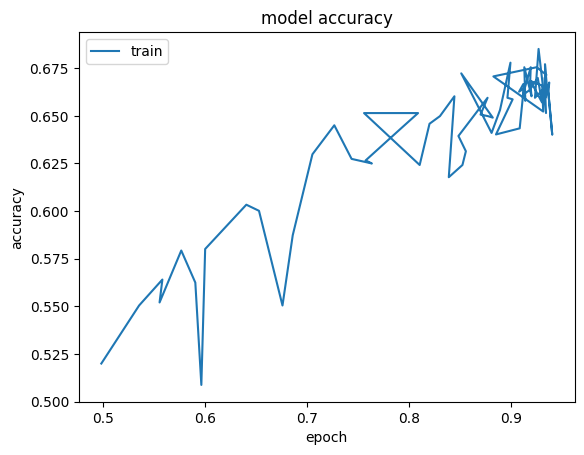

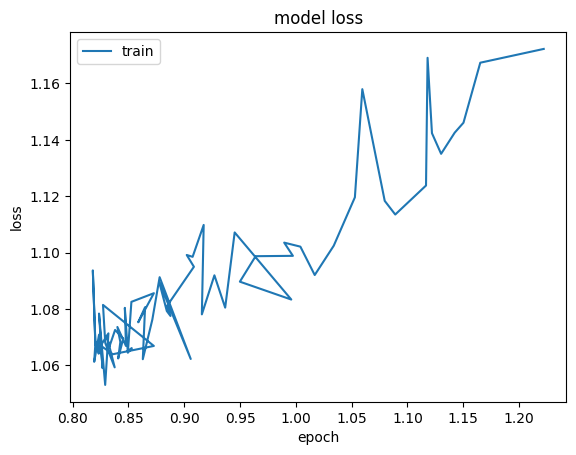

Training Accuracy:
0.9347612261772156
Testing Accuracy:
0.6650640964508057


In [5]:
train_test()

In [21]:
# without moderate folder


import matplotlib.pyplot as plt




def train_test():
    
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # 4 output neuron for the 4 classes of Alzhemir Images
    tf.keras.layers.Dense(3,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax')

    ])

   

    model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='squared_hinge', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

        

    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory

    

    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255,)
   
    #training data
    train_generator = train_datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1/train/",
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=20,
    class_mode="categorical",
    shuffle=True,
    seed=42
    )

    epochs = 120
    #Testing data
    validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1//test/',
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=20,
    class_mode="categorical",
    shuffle=True,
    seed=42) # set as validation data
       
    #Model fitting for a number of epochs
    history = model.fit(
      train_generator,
      steps_per_epoch=int(5121/32),
      epochs=epochs,
      validation_data = validation_generator,
      validation_steps = int(1279/32),
      verbose=1)
    
    train_precision=history.history['precision'][-1]
    train_recall=history.history['recall'][-1]

    val_precision=history.history['val_precision'][-1]
    val_recall=history.history['val_recall'][-1]

In [20]:
train_test()

Found 5069 images belonging to 3 classes.
Found 1267 images belonging to 3 classes.
Epoch 1/120
160/160 [==============================] - 21s 121ms/step - loss: 1.2705 - accuracy: 0.4959 - precision_4: 0.5008 - recall_4: 0.4847 - val_loss: 1.2377 - val_accuracy: 0.5218 - val_precision_4: 0.5530 - val_recall_4: 0.4885
Epoch 2/120
160/160 [==============================] - 18s 113ms/step - loss: 1.2091 - accuracy: 0.5478 - precision_4: 0.5549 - recall_4: 0.5105 - val_loss: 1.1877 - val_accuracy: 0.5513 - val_precision_4: 0.6236 - val_recall_4: 0.4269
Epoch 3/120
160/160 [==============================] - 19s 115ms/step - loss: 1.1938 - accuracy: 0.5594 - precision_4: 0.5729 - recall_4: 0.5084 - val_loss: 1.1895 - val_accuracy: 0.5731 - val_precision_4: 0.5852 - val_recall_4: 0.4974
Epoch 4/120
160/160 [==============================] - 18s 112ms/step - loss: 1.1734 - accuracy: 0.5742 - precision_4: 0.5910 - recall_4: 0.5328 - val_loss: 1.1896 - val_accuracy: 0.5526 - val_precision_4: 0.

KeyError: ignored